### Libraries and Modules

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from PIL import Image

# Modules
from RICM_VESICLE import RICM
from FITTING import Fit_Gaussian

### Determine the Shot and the GUV


In [2]:
# Determine the Shot and the GUV
experiment = '202210215_GUV_Bio5_SOPC5'
shot, guv = 2, 1

### Read the whole RICM image to determine the base line

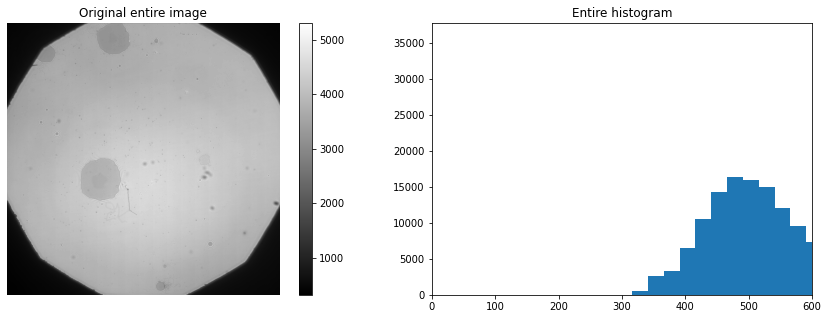

In [3]:
# Read the RICM image
RICM_img = io.imread(f"Data/{experiment}/data/AVG_vesicle_{shot}_MMStack_Default.ome.tif")

# display the image and it's histogram
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.axis('off')
plt.title('Original entire image')
plt.imshow(RICM_img, cmap = "gray")
plt.colorbar()

plt.subplot(122)
plt.title('Entire histogram')
plt.hist(RICM_img.ravel(), bins = 200);
plt.xlim(0,600);

### Read the GUV image and subtract the base line

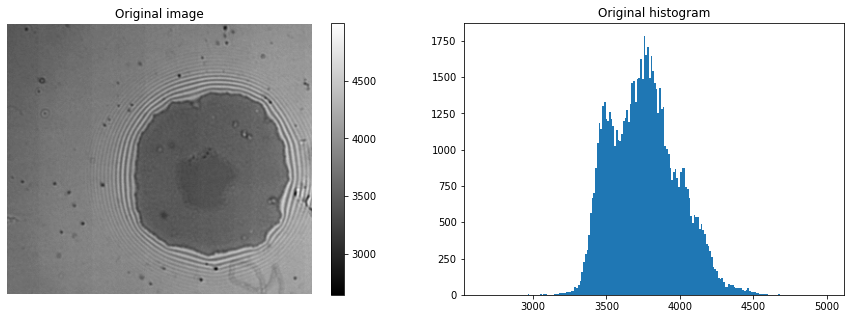

In [4]:
# Read the GUV image
img = io.imread(f"Data/{experiment}/data/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}.tif")

# Subtract the base line
img = img - 310

# display the image and it's histogram
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.axis('off')
plt.title('Original image')
plt.imshow(img, cmap = "gray")
plt.colorbar();

plt.subplot(122)
plt.title('Original histogram')
plt.hist(img.ravel(), bins = 200);
#plt.xlim(70,87)

### Define the RICM model and display the way to the RICM height mapping step by step

Y0 = 0.01, A = 0.24, h0 = 32.11


/home/ahmed/Repositories/Membrane-Topography/RICM_VESICLE.py:274: RuntimeWarning: invalid value encountered in arccos
  return (self.l / (4 * np.pi * self.n_outer)) * np.arccos((Y0 - img_background_normalized) / A) + h0


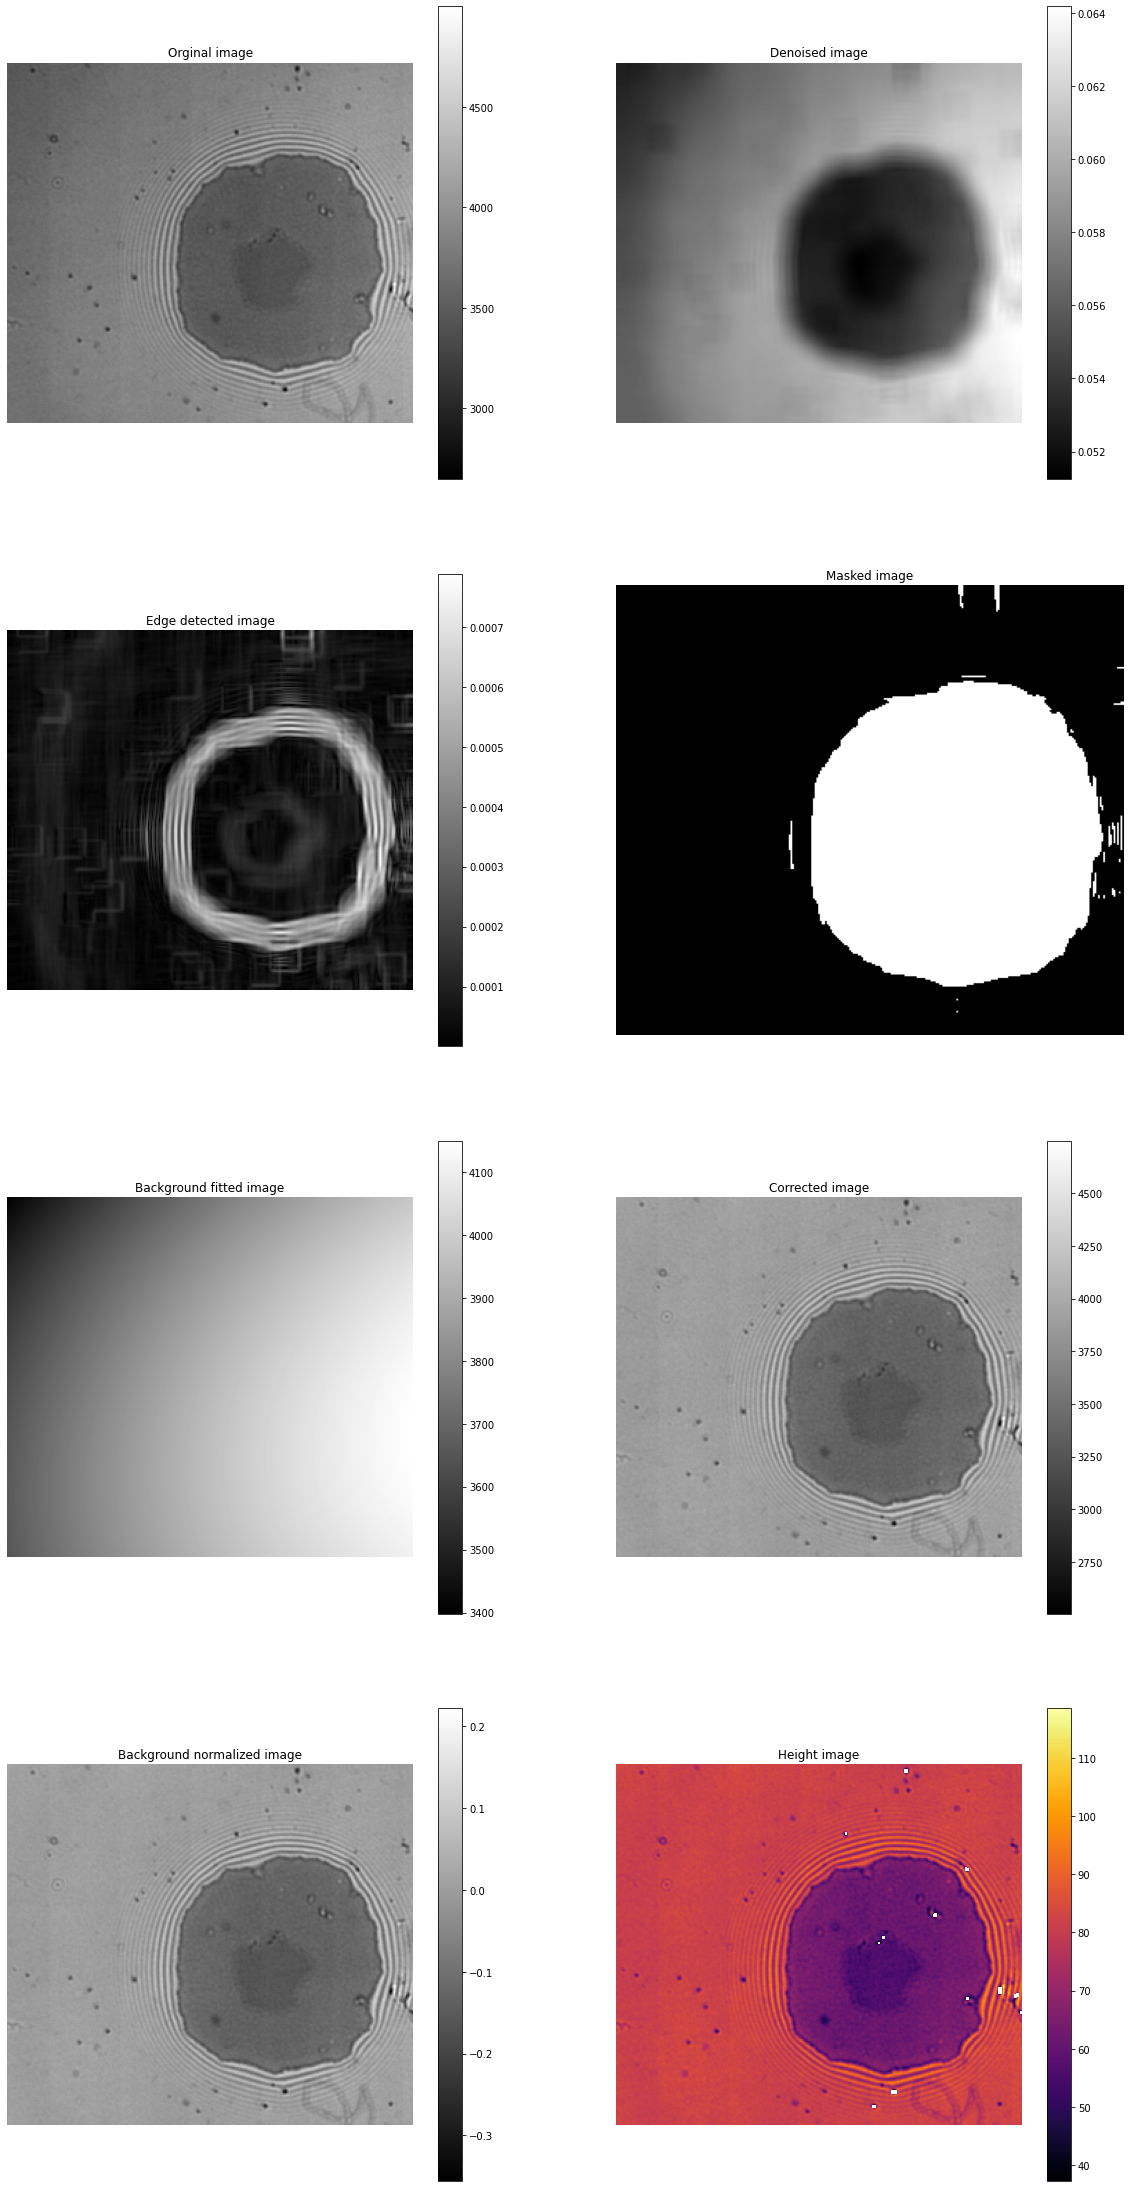

In [5]:
# Define the RICM class with certain n_inner
ricm = RICM(img, n_inner = 1.344, hole = 3)

# display results
plt.figure(figsize=(20,40))

plt.subplot(421)
plt.axis('off')
plt.title('Orginal image')
plt.imshow(img, cmap = "gray")
plt.colorbar()

plt.subplot(422)
plt.axis('off')
plt.title('Denoised image')
plt.imshow(ricm.nl_denoise() , cmap = 'gray')
plt.colorbar()

plt.subplot(423)
plt.axis('off')
plt.title('Edge detected image')
plt.imshow(ricm.edge_detection() , cmap = 'gray')
plt.colorbar();

plt.subplot(424)
plt.axis('off')
plt.title('Masked image')
plt.imshow(ricm.mask() , cmap = 'gray')

plt.subplot(425)
plt.axis('off')
plt.title('Background fitted image')
plt.imshow(ricm.background_fitting() , cmap = 'gray')
plt.colorbar();

plt.subplot(426)
plt.axis('off')
plt.title('Corrected image')
plt.imshow(ricm.correct() , cmap = 'gray')
plt.colorbar()

plt.subplot(427)
plt.axis('off')
plt.title('Background normalized image')
plt.imshow(ricm.background_normalization() , cmap = 'gray')
plt.colorbar();

plt.subplot(428)
plt.axis('off')
plt.title('Height image')
plt.imshow(ricm.height() , cmap = 'inferno')
plt.colorbar();

# Save the image
#plt.savefig('Background subtracted image')

# Show the results
plt.show()

### The histogram of the corrected image

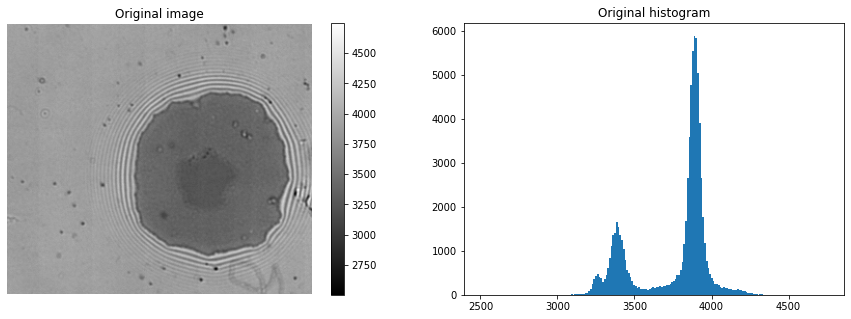

In [6]:
# display the image and it's histogram
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.axis('off')
plt.title('Original image')
plt.imshow(ricm.correct(), cmap = "gray")
plt.colorbar();

plt.subplot(122)
plt.title('Original histogram')
plt.hist(ricm.correct().ravel(), bins = 200);
#plt.xlim(70,87)

### Show the argument of the arcosin to make sure it's between 1 and -1

Y0 = 0.01, A = 0.24, h0 = 32.11


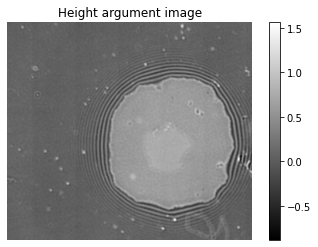

In [7]:
plt.axis('off')
plt.title('Height argument image')
plt.imshow(ricm.height_argument() , cmap = 'gray')
plt.colorbar();

### Display the height image and it's histogram

Y0 = 0.01, A = 0.24, h0 = 32.11
The height of the GUV is 62.54 nm


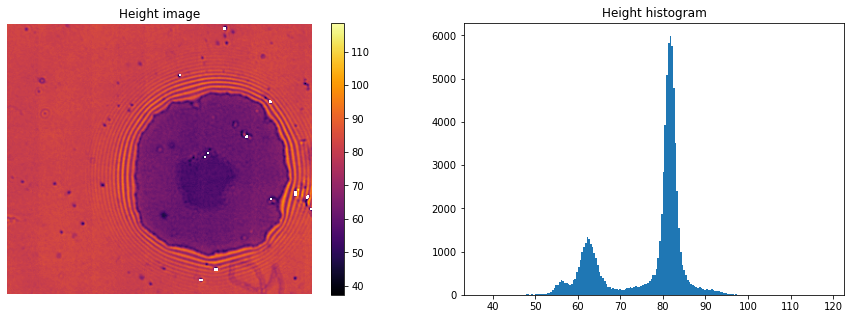

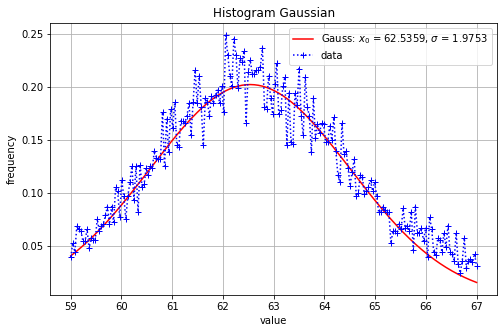

In [8]:
img = ricm.height()

# display the image and it's histogram
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.axis('off')
plt.title('Height image')
plt.imshow(img, cmap = "inferno")
plt.colorbar();

plt.subplot(122)
plt.title('Height histogram')
plt.hist(img.ravel(), bins = 200);
#plt.xlim(70,87)

# Cut the peak of the adhesion zone
adhesion = []
for i in img.ravel():
    if i > 59 and i < 67 :
        adhesion.append(i)
        
# Fit a gaussian on the adhesion zone histogram
gauss = Fit_Gaussian(adhesion, normalized=True)
height, _ = gauss.hist_fitting(show = True)

# Print the height in nano meter
print(f'The height of the GUV is {height:.2f} nm')

### Save the images in tif format

In [10]:
# Create the results directory
os.mkdir(f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm')

# Save the results
Image.fromarray(img).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/original.tif')
Image.fromarray(ricm.nl_denoise()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/nl_denoise.tif')
Image.fromarray(ricm.edge_detection()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/edge_detection.tif')
Image.fromarray(ricm.mask()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/mask.tif')
Image.fromarray(ricm.background_fitting()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/background_fitting.tif')
Image.fromarray(ricm.correct()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/correct.tif')
Image.fromarray(ricm.background_normalization()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/background_normalization.tif')
Image.fromarray(ricm.height()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/height.tif')

Y0 = 0.01, A = 0.24, h0 = 32.11
